# 데이터 탐색

## 데이터 확인

In [1]:
from Package.loadfile import load

perform_df, rating_df, test_df = load()

In [3]:
perform_df.describe()

,노출(분),마더코드,상품코드,판매단가,취급액
count,38309.000000,38309.000000,38309.000000,3.737200e+04,3.537900e+04
mean,20.442585,100390.972148,201219.923334,4.680006e+05,2.310241e+07
std,3.411614,249.927870,735.677344,7.314484e+05,2.005790e+07
min,2.000000,100000.000000,200000.000000,1.280000e+04,1.030000e+05
25%,20.000000,100155.000000,200550.000000,5.900000e+04,7.998500e+06
50%,20.000000,100346.000000,201167.000000,1.099000e+05,1.732600e+07
75%,20.000000,100596.000000,201863.000000,5.090000e+05,3.276300e+07
max,60.000000,100849.000000,202513.000000,7.930000e+06,3.220090e+08


In [7]:
rating_df.set_index('시간대').T.describe()

시간대,02:00,02:01,02:02,02:03,02:04,02:05,02:06,02:07,02:08,02:09,...,01:50,01:51,01:52,01:53,01:54,01:55,01:56,01:57,01:58,01:59
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.002518,0.003074,0.003600,0.003534,0.003767,0.003775,0.003003,0.002890,0.002663,0.003115,...,0.004134,0.003863,0.003827,0.003866,0.003951,0.003759,0.003984,0.004055,0.003973,0.003819
std,0.007835,0.008653,0.011514,0.011406,0.013939,0.010902,0.008351,0.007942,0.007632,0.009524,...,0.009706,0.008854,0.008738,0.008862,0.009336,0.008921,0.009668,0.009801,0.010201,0.009597
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.065000,0.065000,0.134000,0.128000,0.198000,0.083000,0.063000,0.051000,0.051000,0.097000,...,0.071000,0.046000,0.046000,0.059000,0.059000,0.058000,0.070000,0.070000,0.086000,0.070000


In [8]:
perform_df

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 15:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,2099000.0
1,2019-01-01 15:00:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900.0,4371000.0
2,2019-01-01 15:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,3262000.0
3,2019-01-01 15:20:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900.0,6955000.0
4,2019-01-01 15:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,6672000.0
...,...,...,...,...,...,...,...,...
38304,2020-01-01 09:20:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN
38305,2020-01-01 09:40:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN
38306,2020-01-01 10:00:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN
38307,2020-01-01 10:20:00,20,100490,201478,더케이 예다함 상조서비스(티포트),무형,NaN,NaN


In [3]:
rating_df

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
0,02:00,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
1,02:01,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.012
2,02:02,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
3,02:03,0.0,0.0,0.014,0.0,0.000,0.0,0.0,0.0,0.000,...,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
4,02:04,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,...,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,01:55,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
1436,01:56,0.0,0.0,0.000,0.0,0.027,0.0,0.0,0.0,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
1437,01:57,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
1438,01:58,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,...,0.0,0.013,0.017,0.000,0.0,0.015,0.0,0.0,0.019,0.000


In [2]:
test_df

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 15:20:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800.0,NaN
1,2020-06-01 15:40:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800.0,NaN
2,2020-06-01 16:00:00,20,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800.0,NaN
3,2020-06-01 16:20:00,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900.0,NaN
4,2020-06-01 16:40:00,20,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900.0,NaN
...,...,...,...,...,...,...,...,...
2886,2020-07-01 09:20:00,20,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,NaN,NaN
2887,2020-07-01 09:40:00,20,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,NaN,NaN
2888,2020-07-01 10:00:00,20,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,NaN,NaN
2889,2020-07-01 10:20:00,20,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900.0,NaN


## 매출액 데이터

### 상관분석

In [8]:
import copy
avg_item = copy.deepcopy(perform_df.groupby('상품코드').mean())[['노출(분)',' 취급액 ']]

In [7]:
avg_item.corr()

,노출(분),취급액
노출(분),1.000000,0.038395
취급액,0.038395,1.000000


### 시간대 별 매출액, 판매량 산점도

In [21]:
perform_df['시간대'] = list(map(lambda i : i.time().hour, perform_df['방송일시']))
datas = perform_df.dropna().groupby('시간대').mean()[' 취급액 ']

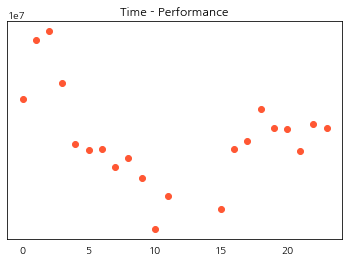

In [22]:
plt.scatter(datas.index, datas, color='#FF5733')
plt.tick_params(bottom=False, left=False, labelleft=False)
plt.title('Time - Performance')
plt.show()

In [23]:
perform_df['판매량'] = perform_df[' 취급액 '] / perform_df['판매단가']
datas = perform_df.dropna().groupby('시간대').mean()['판매량']

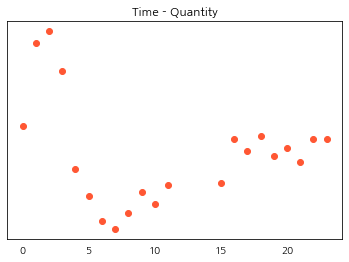

In [24]:
plt.scatter(datas.index, datas, color='#FF5733')
plt.tick_params(bottom=False, left=False, labelleft=False)
plt.title('Time - Quantity')
plt.show()

### 상품군 별 매출액 BoxPlot

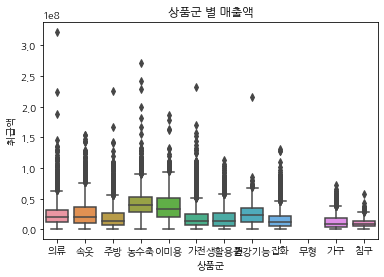

In [25]:
import seaborn as sns
sns.boxplot(x = "상품군", y = " 취급액 ", data = perform_df)
plt.title('상품군 별 매출액')
plt.show()

### 일별 판매량 그래프

In [29]:
perform_df['날짜'] = list(map(lambda i : i.date(), perform_df['방송일시']))
perform_df['월일'] = list(map(lambda i : '{:02d}_{:02d}'.format(i.month, i.day), perform_df['날짜']))

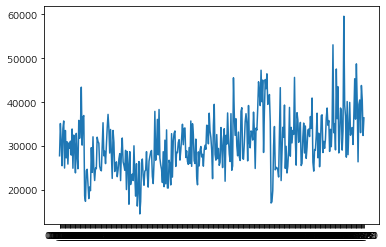

In [30]:
import matplotlib.pyplot as plt
plt.plot(perform_df.dropna().groupby('월일').sum()['판매량'])

### 상품명 (토큰) 별 판매량 분석

In [32]:
item_names = list(map(lambda i : i.split(), perform_df['상품명']))
perform_df['상품토큰'] = item_names

In [35]:
import pandas as pd
import nltk
import itertools
total_token = list(itertools.chain(*list(perform_df['상품토큰'])))
fdist = nltk.FreqDist(total_token)
temp_df = pd.DataFrame(list(zip(fdist.keys(), fdist.values())), columns= ['word', 'count'])

In [36]:
temp_df

,word,count
0,테이트,121
1,남성,1604
2,셀린니트3종,10
3,여성,1347
4,오모떼,266
...,...,...
2572,행복한파트너,3
2573,주택화재보험(1912),3
2574,더케이,2
2575,예다함,2


In [37]:
temp_df['Q'] = 0

In [38]:
temp_df.set_index('word', inplace=True)

In [39]:
temp_df

,count,Q
word,,
테이트,121,0
남성,1604,0
셀린니트3종,10,0
여성,1347,0
오모떼,266,0
...,...,...
행복한파트너,3,0
주택화재보험(1912),3,0
더케이,2,0


In [40]:
for x in perform_df.dropna().iloc:
    temp = pd.DataFrame(x['상품토큰'], columns = ['word']).set_index('word').groupby('word').sum()
    temp['Q'] = x['판매량']
    temp_df['Q'][temp.index] += temp['Q']

In [ ]:
temp_df.loc[['남성','여성']]['Q']

In [42]:
temp_df['avg'] = temp_df['Q'] / temp_df['count']

In [49]:
temp_df[temp_df['count']>300].sort_values('avg', ascending=False).head(10)

,count,Q,avg
word,,,
안동간고등어,318,465758.867314,1464.650526
20팩,324,470799.168066,1453.083852
비버리힐스폴로클럽,488,566812.336683,1161.500690
국내산,648,649989.296369,1003.069902
8팩,620,536590.403535,865.468393
2종,553,332649.201257,601.535626
썸머,464,203675.092739,438.954941
4종,494,207424.343559,419.887335
분쇄믹서기,401,165464.444444,412.629537


In [50]:
temp_df.to_json('datas/result_data/token_Q.json')

### 시계열 분석

In [ ]:
dates = pd.date_range('2019-01-01', periods=366, freq='D')

In [ ]:
ts.index = dates

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ts, model='additive')
plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()

## 시청률 데이터

### 1년 평균 시청률 그래프

In [10]:
rating_df.groupby('시간대').sum().mean(axis=1)

시간대
00:00    0.004641
00:01    0.004945
00:02    0.005526
00:03    0.005030
00:04    0.004233
           ...   
23:55    0.005326
23:56    0.004605
23:57    0.005025
23:58    0.004964
23:59    0.004951
Length: 1440, dtype: float64

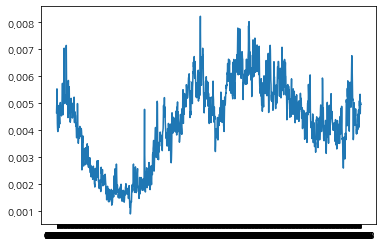

In [9]:
plt.plot(rating_df.groupby('시간대').sum().mean(axis=1))
plt.show()